In [1]:
import numpy as np
import time
import statistics
import random
from decimal import *

## Timsort

In [2]:
# Python3 program to perform basic timSort
MIN_MERGE = 32


def calcMinRun(n):
	"""Returns the minimum length of a
	run from 23 - 64 so that
	the len(array)/minrun is less than or
	equal to a power of 2.

	e.g. 1=>1, ..., 63=>63, 64=>32, 65=>33,
	..., 127=>64, 128=>32, ...
	"""
	r = 0
	while n >= MIN_MERGE:
		r |= n & 1
		n >>= 1
	return n + r


# This function sorts array from left index to
# to right index which is of size atmost RUN
def insertionSort(arr, left, right):
	for i in range(left + 1, right + 1):
		j = i
		while j > left and arr[j] < arr[j - 1]:
			arr[j], arr[j - 1] = arr[j - 1], arr[j]
			j -= 1


# Merge function merges the sorted runs
def merge(arr, l, m, r):

	# original array is broken in two parts
	# left and right array
	len1, len2 = m - l + 1, r - m
	left, right = [], []
	for i in range(0, len1):
		left.append(arr[l + i])
	for i in range(0, len2):
		right.append(arr[m + 1 + i])

	i, j, k = 0, 0, l

	# after comparing, we merge those two array
	# in larger sub array
	while i < len1 and j < len2:
		if left[i] <= right[j]:
			arr[k] = left[i]
			i += 1

		else:
			arr[k] = right[j]
			j += 1

		k += 1

	# Copy remaining elements of left, if any
	while i < len1:
		arr[k] = left[i]
		k += 1
		i += 1

	# Copy remaining element of right, if any
	while j < len2:
		arr[k] = right[j]
		k += 1
		j += 1


# Iterative Timsort function to sort the
# array[0...n-1] (similar to merge sort)
def timSort(arr):
	n = len(arr)
	minRun = calcMinRun(n)

	# Sort individual subarrays of size RUN
	for start in range(0, n, minRun):
		end = min(start + minRun - 1, n - 1)
		insertionSort(arr, start, end)

	# Start merging from size RUN (or 32). It will merge
	# to form size 64, then 128, 256 and so on ....
	size = minRun
	while size < n:

		# Pick starting point of left sub array. We
		# are going to merge arr[left..left+size-1]
		# and arr[left+size, left+2*size-1]
		# After every merge, we increase left by 2*size
		for left in range(0, n, 2 * size):

			# Find ending point of left sub array
			# mid+1 is starting point of right sub array
			mid = min(n - 1, left + size - 1)
			right = min((left + 2 * size - 1), (n - 1))

			# Merge sub array arr[left.....mid] &
			# arr[mid+1....right]
			if mid < right:
				merge(arr, left, mid, right)

		size = 2 * size

In [3]:
def generateRandomVector(size):
    # arr = [random.randint(0, 99) for _ in range(size)] # too slow!
    arr = np.random.randint(low=0, high=99, size=size)
    return arr
    
# O(1)
# Independently of the input data size, 
# it will always have the same running time 
# since it only gets the first value from the list.
def getFirst(arr):
    return arr[0]

# O(n)
def sumOfElements(arr):
    result = 0
    for each in arr:
        result += each
    return result

# O(n^2)
def bubbleSort(arr):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(arr)-1):
            if arr[i] > arr[i+1]:
                arr[i], arr[i+1] = arr[i+1], arr[i]
                swapped = True

def polinomialP(arr, n):
    sum = 0
    for k in range(1, n):
        try :
            x = Decimal(pow(1.5, k-1))
            sum += arr[k-1]*x
        except OverflowError:
            print("Got stuck at k = ", k)
            return sum
    return sum

def polinomialPHornersMethod(arr, n):
    result = 1
    x = 1.5
    for k in range(n-1, 0, -1):
        try:
            result = result*x
            result = result+arr[k]
        except OverflowError:
            print("Got stuck at k = ", k)
            return result
    return result



In [4]:
MAX_LEN = 2000
ITERATIONS = 5
timestamps = [] 
dimensions = [] 

for length in range(1, MAX_LEN+1):
    arr = generateRandomVector(length)
    # print("Vector: ",arr)
    ts = []
    for i in range(ITERATIONS):        
        start = time.process_time()
        # getFirst(arr)
        # sumOfElements(arr)
        polinomialP(arr, length)
        # polinomialPHornersMethod(arr, length)
        # bubbleSort(arr)
        # timSort(arr)
        end = time.process_time()
        execution_time = end - start
        ts.append(execution_time)
    # print(ts)
    average_time = statistics.mean(ts)
    # print(average_time)
    dimensions.append(length)
    timestamps.append(average_time)    

Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck at k =  1752
Got stuck a

In [75]:
dimensions_bubblesort=dimensions
timestamps_bubblesort=timestamps

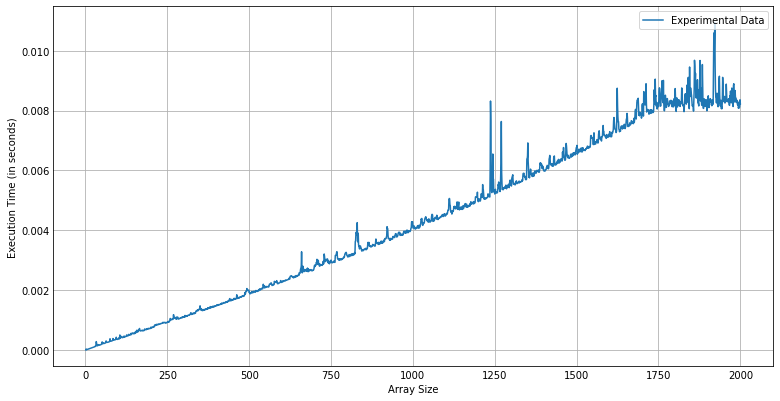

In [5]:
from cmath import log
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([1, 1, 1, 1])
ax.set_ylabel('Execution Time (in seconds)')
ax.set_xlabel('Array Size')

ax1 = ax.plot(dimensions, timestamps, label="Experimental Data")
# ax2 = ax.plot(dimensions, [each/pow(10, 7.37) for each in dimensions], label="Theoretical Data")
# ax2 = ax.plot(dimensions, [each/pow(10, 6.85) for each in dimensions], label="Theoretical Data")
# ax2 = ax.plot(dimensions, [1/pow(10, 6) for each in dimensions], label="Theoretical Data")
# ax2 = ax.plot(dimensions, [(each*each)/pow(10, 7.55) for each in dimensions], label="Theoretical Data")
# ax2 = ax.plot(dimensions, [each*log(each)/pow(10, 6.7) for each in dimensions], label="Theoretical Data")
ax.legend(loc='upper right')


#  This will plot a simple scatter chart
# plt.scatter(x, y)
plt.show()